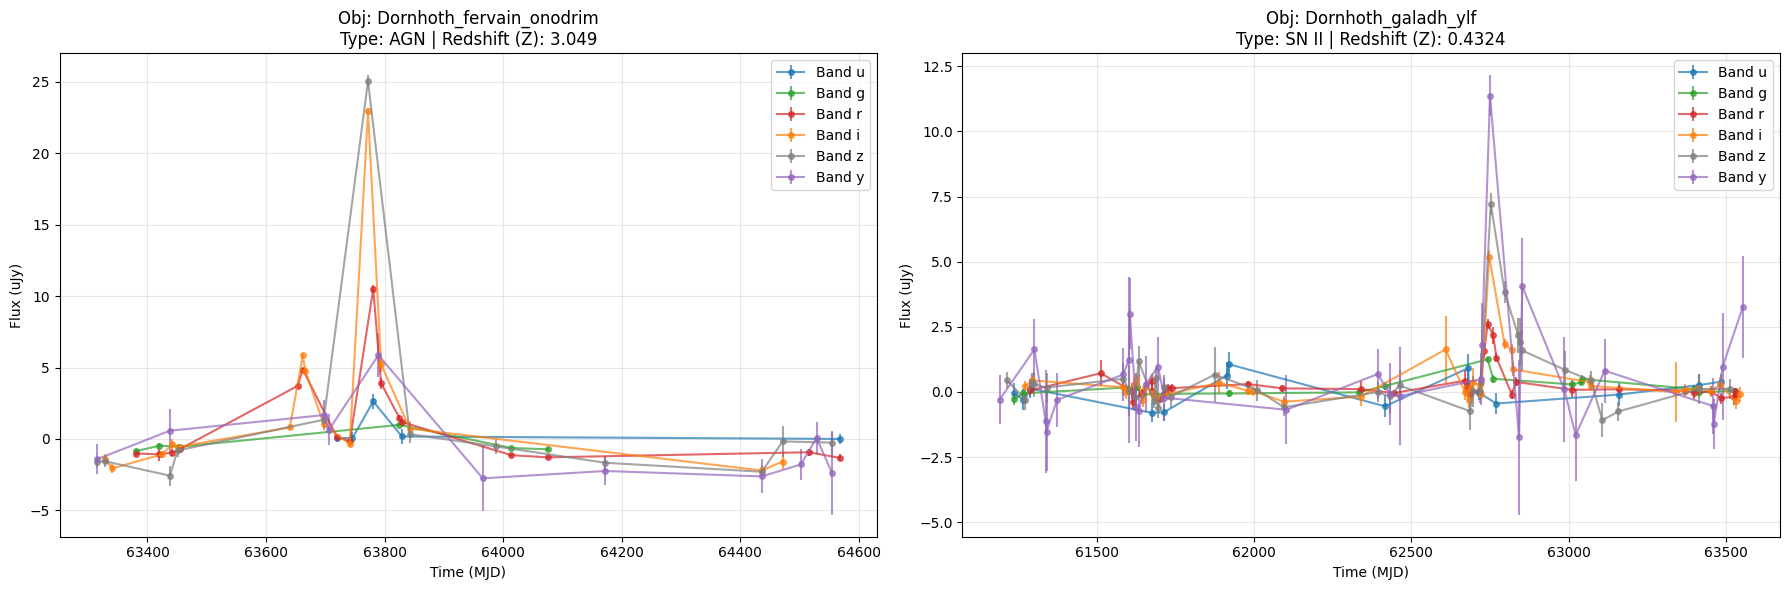

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt

# 1. Load the provided data strings into Pandas DataFrames
lightcurve_csv = """object_id,Time (MJD),Flux,Flux_err,Filter
Dornhoth_fervain_onodrim,63314.4662,-1.63015865,0.36577725,z
Dornhoth_fervain_onodrim,63780.9674,10.49938934,0.25386745,r
Dornhoth_fervain_onodrim,63789.7693,5.86625017,1.55924117,y
Dornhoth_fervain_onodrim,63794.1702,3.90362311,0.37685427,r
Dornhoth_fervain_onodrim,63794.1702,5.22664371,0.51686364,i
Dornhoth_fervain_onodrim,63824.9769,0.98480425,0.10991874,g
Dornhoth_fervain_onodrim,63824.9769,1.48501243,0.18152918,r
Dornhoth_fervain_onodrim,63829.3779,0.17076627,0.55187903,u
Dornhoth_fervain_onodrim,63829.3779,1.18322247,0.20841877,r
Dornhoth_fervain_onodrim,63842.5807,0.72568388,0.53321171,i
Dornhoth_fervain_onodrim,63842.5807,0.33209121,0.62891409,z
Dornhoth_fervain_onodrim,63965.8074,-2.75628465,2.31929264,y
Dornhoth_fervain_onodrim,63987.8122,-0.52358212,0.53431403,z
Dornhoth_fervain_onodrim,64014.2179,-0.63321465,0.07486535,g
Dornhoth_fervain_onodrim,64014.2179,-1.13814471,0.10034363,r
Dornhoth_fervain_onodrim,64075.8313,-0.72358055,0.10202884,g
Dornhoth_fervain_onodrim,64075.8313,-1.28865838,0.12380578,r
Dornhoth_fervain_onodrim,64172.6523,-1.66970254,0.46310302,z
Dornhoth_fervain_onodrim,64436.7095,-2.20836619,0.30203693,i
Dornhoth_fervain_onodrim,64436.7095,-2.29624712,0.3899673,z
Dornhoth_fervain_onodrim,64436.7095,-2.62380591,1.18752915,y
Dornhoth_fervain_onodrim,64471.9171,-1.58653264,0.54833788,i
Dornhoth_fervain_onodrim,64471.9171,-0.17479825,1.11380109,z
Dornhoth_fervain_onodrim,64502.7238,-1.78688759,1.11166284,y
Dornhoth_fervain_onodrim,64515.9267,-0.93279985,0.23668452,r
Dornhoth_fervain_onodrim,64529.1295,0.07792122,1.09858018,y
Dornhoth_fervain_onodrim,64555.5353,-0.25929793,0.84639011,z
Dornhoth_fervain_onodrim,64555.5353,-2.4125246,2.89482771,y
Dornhoth_fervain_onodrim,64568.7381,0.00043537,0.34709593,u
Dornhoth_fervain_onodrim,64568.7381,-1.32745285,0.23934628,r
Dornhoth_fervain_onodrim,63780.9674,2.62629444,0.51585765,u
Dornhoth_fervain_onodrim,63772.1655,25.04734337,0.40179301,z
Dornhoth_fervain_onodrim,64172.6523,-2.24478748,0.95918553,y
Dornhoth_fervain_onodrim,63745.7597,0.05371594,0.43219945,u
Dornhoth_fervain_onodrim,63772.1655,22.95132322,0.21520561,i
Dornhoth_fervain_onodrim,63314.4662,-1.42453719,1.05952601,y
Dornhoth_fervain_onodrim,63327.6691,-1.40901148,0.32113209,i
Dornhoth_fervain_onodrim,63327.6691,-1.55806717,0.39756886,z
Dornhoth_fervain_onodrim,63340.872,-2.0574365,0.33268383,i
Dornhoth_fervain_onodrim,63380.4806,-0.85507366,0.1740725,g
Dornhoth_fervain_onodrim,63380.4806,-1.02159615,0.17362624,r
Dornhoth_fervain_onodrim,63420.0891,-1.07360307,0.44364241,r
Dornhoth_fervain_onodrim,63424.4901,-1.08099876,0.22009042,i
Dornhoth_fervain_onodrim,63437.693,-2.57110113,0.70170834,z
Dornhoth_fervain_onodrim,63437.693,0.57579294,1.51286425,y
Dornhoth_fervain_onodrim,63442.0939,-0.95177213,0.24072305,r
Dornhoth_fervain_onodrim,63442.0939,-0.36268955,0.37769188,i
Dornhoth_fervain_onodrim,63450.8958,-0.56746429,0.18982365,i
Dornhoth_fervain_onodrim,63450.8958,-0.80534336,0.43465582,z
Dornhoth_fervain_onodrim,63420.0891,-0.47294428,0.16456392,g
Dornhoth_fervain_onodrim,63455.2968,-0.69677697,0.13704013,r
Dornhoth_fervain_onodrim,63741.3588,-0.36783976,0.19807938,i
Dornhoth_fervain_onodrim,63455.2968,-0.54626286,0.08991374,g
Dornhoth_fervain_onodrim,63741.3588,-0.17662504,0.15171229,r
Dornhoth_fervain_onodrim,63719.354,0.15968814,0.16657323,r
Dornhoth_fervain_onodrim,63719.354,0.06886199,0.26937679,u
Dornhoth_fervain_onodrim,63697.3492,1.66939726,1.05694771,y
Dornhoth_fervain_onodrim,63697.3492,1.34158252,0.54318573,z
Dornhoth_fervain_onodrim,63706.1512,0.63917429,1.08582074,y
Dornhoth_fervain_onodrim,63697.3492,1.01028252,0.24012888,i
Dornhoth_fervain_onodrim,63666.5426,4.75374346,0.16535441,i
Dornhoth_fervain_onodrim,63662.1416,5.84318745,0.14323535,i
Dornhoth_fervain_onodrim,63662.1416,4.85774275,0.10924938,r
Dornhoth_fervain_onodrim,63653.3397,3.71099283,0.17589918,r
Dornhoth_fervain_onodrim,63640.1368,0.80237936,0.18674122,i
Dornhoth_galadh_ylf,62760.1618,2.16981123,0.33679341,r
Dornhoth_galadh_ylf,62747.324,5.19313886,0.26178997,i
Dornhoth_galadh_ylf,62742.1888,1.25000955,0.09639146,g
Dornhoth_galadh_ylf,62749.8915,11.37549944,0.77599385,y
Dornhoth_galadh_ylf,62752.4591,7.22963913,0.42072312,z
Dornhoth_galadh_ylf,62760.1618,0.50602242,0.14616042,g
Dornhoth_galadh_ylf,62742.1888,2.62082436,0.19097891,r
Dornhoth_galadh_ylf,62770.432,-0.44487151,0.39376693,u
Dornhoth_galadh_ylf,62832.0535,0.38476052,0.17329988,r
Dornhoth_galadh_ylf,62796.1076,1.8469497,0.20374781,i
Dornhoth_galadh_ylf,62796.1076,3.84335542,0.41284955,z
Dornhoth_galadh_ylf,62819.2157,-0.0997982,0.15507547,r
Dornhoth_galadh_ylf,62819.2157,1.61320674,0.21428778,i
Dornhoth_galadh_ylf,62821.7832,0.86920117,0.26724035,i
Dornhoth_galadh_ylf,62839.7562,2.16613213,0.66208084,z
Dornhoth_galadh_ylf,62731.9186,1.55880386,0.25968217,r
Dornhoth_galadh_ylf,62842.3237,-1.74708161,2.96767638,y
Dornhoth_galadh_ylf,62770.432,1.31916604,0.17882797,r
Dornhoth_galadh_ylf,62724.2159,1.80415235,1.59078539,y
Dornhoth_galadh_ylf,62680.5674,0.09489507,0.29260259,r
Dornhoth_galadh_ylf,62721.6484,0.3960998,0.44274123,z
Dornhoth_galadh_ylf,62844.8913,1.91581185,0.91937306,z
Dornhoth_galadh_ylf,62670.2971,0.43319863,0.40082471,r
Dornhoth_galadh_ylf,62670.2971,-0.00380623,0.29682784,i
Dornhoth_galadh_ylf,62680.5674,0.91298156,0.54981968,u
Dornhoth_galadh_ylf,62683.1349,0.07928768,0.32626755,u
Dornhoth_galadh_ylf,62683.1349,0.14573861,0.26187573,r
Dornhoth_galadh_ylf,62683.1349,-0.30125206,0.31174742,i
Dornhoth_galadh_ylf,62685.7025,-0.08233381,0.18318641,r
Dornhoth_galadh_ylf,62685.7025,0.13371556,0.33720712,i
Dornhoth_galadh_ylf,62685.7025,-0.73529926,0.70747514,z
Dornhoth_galadh_ylf,62695.9728,0.36547657,0.54499897,i
Dornhoth_galadh_ylf,62695.9728,0.01987639,0.60815848,z
Dornhoth_galadh_ylf,62713.9457,-0.02963551,0.28714973,u
Dornhoth_galadh_ylf,62713.9457,0.05032793,0.13426989,r
Dornhoth_galadh_ylf,62719.0808,0.25622204,0.19702664,i
Dornhoth_galadh_ylf,62719.0808,0.03933087,0.4629655,z
Dornhoth_galadh_ylf,62721.6484,-0.08169238,0.23440456,i
Dornhoth_galadh_ylf,62721.6484,0.48865772,0.99660976,y
Dornhoth_galadh_ylf,62852.594,1.59107544,0.76980032,z
Dornhoth_galadh_ylf,63489.3491,0.96713926,2.05376781,y
Dornhoth_galadh_ylf,62986.1071,0.09423679,2.00292863,y
Dornhoth_galadh_ylf,63414.8898,0.1131999,0.57271243,z
Dornhoth_galadh_ylf,63450.8356,0.03073448,0.19397022,r
Dornhoth_galadh_ylf,63450.8356,0.0228773,0.21756061,i
Dornhoth_galadh_ylf,63458.5383,-0.54043297,1.05990925,y
Dornhoth_galadh_ylf,63461.1059,-1.23236353,0.96328204,y
Dornhoth_galadh_ylf,63481.6464,0.28928585,0.29231961,i
Dornhoth_galadh_ylf,63484.2139,0.39358799,0.29676903,u
Dornhoth_galadh_ylf,63484.2139,-0.24422507,0.20711222,r
Dornhoth_galadh_ylf,62608.6757,1.63178599,1.28822896,i
Dornhoth_galadh_ylf,63512.4571,0.11455748,0.39596959,z
Dornhoth_galadh_ylf,63525.2949,-0.18022554,0.33320911,r
Dornhoth_galadh_ylf,63527.8625,0.03937522,0.08166332,g
Dornhoth_galadh_ylf,63527.8625,0.02306077,0.13148844,r
Dornhoth_galadh_ylf,63530.43,-0.12509697,0.19863399,r
Dornhoth_galadh_ylf,63530.43,-0.36363998,0.30930387,i
Dornhoth_galadh_ylf,63545.8354,-0.09088298,0.29040271,i
Dornhoth_galadh_ylf,63553.5381,3.26438012,1.97173567,y
Dornhoth_galadh_ylf,63414.8898,0.13668614,0.32823968,i
Dornhoth_galadh_ylf,63414.8898,-0.0110656,0.1761099,g
Dornhoth_galadh_ylf,63414.8898,0.2611888,0.41586584,u
Dornhoth_galadh_ylf,63399.4844,-0.05016864,0.2261248,r
Dornhoth_galadh_ylf,62988.6747,0.84406941,0.72934573,z
Dornhoth_galadh_ylf,63011.7827,0.28878046,0.17922781,g
Dornhoth_galadh_ylf,63011.7827,0.08018808,0.26043811,r
Dornhoth_galadh_ylf,63022.053,-1.65692772,1.75745722,y
Dornhoth_galadh_ylf,63040.0259,0.36996769,0.10227982,g
Dornhoth_galadh_ylf,63042.5935,0.49372106,0.17081937,g
Dornhoth_galadh_ylf,63068.2691,0.37305436,0.27690286,i
Dornhoth_galadh_ylf,63070.8366,0.22890572,0.17487008,i
Dornhoth_galadh_ylf,62852.594,4.04714756,1.85724901,y
Dornhoth_galadh_ylf,63070.8366,0.4419971,0.34599428,z
Dornhoth_galadh_ylf,63114.4852,0.81431398,1.22568942,y
Dornhoth_galadh_ylf,63158.1337,-0.74920635,0.38098218,z
Dornhoth_galadh_ylf,63160.7013,-0.09969926,0.45353623,u
Dornhoth_galadh_ylf,63160.7013,0.10111543,0.14720506,r
Dornhoth_galadh_ylf,63340.4305,-0.00252133,1.16101866,i
Dornhoth_galadh_ylf,63371.2413,0.05251864,0.1884651,r
Dornhoth_galadh_ylf,63371.2413,0.07007092,0.24601989,i
Dornhoth_galadh_ylf,63399.4844,0.10907927,0.16391215,g
Dornhoth_galadh_ylf,63106.7825,-1.08668705,0.65180869,z
Dornhoth_galadh_ylf,62462.3247,-0.16018837,1.89350901,y
Dornhoth_galadh_ylf,61738.2725,0.14441319,0.15387051,r
Dornhoth_galadh_ylf,62444.3518,-0.04294557,0.12744083,r
Dornhoth_galadh_ylf,61594.4891,0.00304458,0.25767459,i
Dornhoth_galadh_ylf,61602.1918,0.05134971,0.97573445,z
Dornhoth_galadh_ylf,61602.1918,1.24094403,3.18485692,y
Dornhoth_galadh_ylf,61604.7594,3.00772566,1.37118888,y
Dornhoth_galadh_ylf,61612.4621,0.03176008,0.30932374,r
Dornhoth_galadh_ylf,61615.0296,-0.37188772,0.31576272,r
Dornhoth_galadh_ylf,61622.7323,0.3491423,0.20758284,i
Dornhoth_galadh_ylf,61622.7323,-0.19328337,0.55624223,z
Dornhoth_galadh_ylf,61625.2999,0.50046003,0.22163852,i
Dornhoth_galadh_ylf,61625.2999,-0.57928362,1.30099444,y
Dornhoth_galadh_ylf,61627.8674,0.1913027,0.14683847,g
Dornhoth_galadh_ylf,62462.3247,0.24871237,0.58795171,z
Dornhoth_galadh_ylf,61633.0026,-0.74452444,1.37687641,y
Dornhoth_galadh_ylf,61643.2728,-0.09983606,0.14274065,g
Dornhoth_galadh_ylf,61643.2728,-0.03205451,0.16185187,r
Dornhoth_galadh_ylf,61648.4079,-0.29372514,0.30159816,i
Dornhoth_galadh_ylf,61653.543,0.19972192,0.19370287,i
Dornhoth_galadh_ylf,61584.2189,0.66951392,1.01233427,y
Dornhoth_galadh_ylf,61584.2189,0.50314757,0.62503829,z
Dornhoth_galadh_ylf,61584.2189,0.17987835,0.32274559,i
Dornhoth_galadh_ylf,61512.3272,0.71809224,0.48924286,r
Dornhoth_galadh_ylf,61191.3821,-0.2962423,0.95289391,y
Dornhoth_galadh_ylf,61214.4901,0.448035,0.30495056,z
Dornhoth_galadh_ylf,61237.5982,-0.04348234,0.37590479,u
Dornhoth_galadh_ylf,61237.5982,-0.28106908,0.22571695,g
Dornhoth_galadh_ylf,61265.8413,-0.30204755,0.39776842,u
Dornhoth_galadh_ylf,61265.8413,-0.05421385,0.11648708,g
Dornhoth_galadh_ylf,61273.544,0.22711748,0.20683201,i
Dornhoth_galadh_ylf,61273.544,-0.29894617,0.38487483,z
Dornhoth_galadh_ylf,61656.1106,0.30994902,1.08068788,y
Dornhoth_galadh_ylf,61288.9494,0.12818941,0.3609951,u
Dornhoth_galadh_ylf,61294.0845,0.44317669,0.23068222,i
Dornhoth_galadh_ylf,61294.0845,0.36383623,0.37823987,z
Dornhoth_galadh_ylf,61301.7872,0.29494983,0.4828618,z
Dornhoth_galadh_ylf,61301.7872,1.63385101,1.15397109,y
Dornhoth_galadh_ylf,61337.7331,-1.13314223,1.96636641,y
Dornhoth_galadh_ylf,61340.3006,0.16824076,0.55986958,z
Dornhoth_galadh_ylf,61340.3006,-1.52064896,1.50476143,y
Dornhoth_galadh_ylf,61373.6789,-0.30757465,1.05106531,y
Dornhoth_galadh_ylf,61288.9494,0.05912415,0.19249844,r
Dornhoth_galadh_ylf,61674.0835,-0.7992538,0.36915523,u
Dornhoth_galadh_ylf,61633.0026,1.1717363,0.5987961,z
Dornhoth_galadh_ylf,61676.6511,0.02440071,0.1196294,r
Dornhoth_galadh_ylf,61982.1908,0.30051617,0.12185037,r
Dornhoth_galadh_ylf,61982.1908,0.03452645,0.17161801,i
Dornhoth_galadh_ylf,61997.5962,0.03294364,0.2000074,i
Dornhoth_galadh_ylf,62010.434,0.07155836,0.40515569,z
Dornhoth_galadh_ylf,62090.0284,0.13790797,0.14208356,r
Dornhoth_galadh_ylf,61674.0835,0.42547587,0.26423948,r
Dornhoth_galadh_ylf,62095.1635,-0.58659729,0.34614511,z
Dornhoth_galadh_ylf,62102.8662,-0.68488953,1.33183259,y
Dornhoth_galadh_ylf,62333.9467,-0.01547093,0.14191855,g
Dornhoth_galadh_ylf,62339.0818,0.10763746,0.29733925,r
Dornhoth_galadh_ylf,62339.0818,-0.18206964,0.34737147,i
Dornhoth_galadh_ylf,62393.0006,-0.00535682,0.39103653,z
Dornhoth_galadh_ylf,62393.0006,0.68755746,0.95146373,y
Dornhoth_galadh_ylf,62416.1086,-0.55256321,0.41691464,u
Dornhoth_galadh_ylf,62416.1086,0.23023901,0.15683861,g
Dornhoth_galadh_ylf,62431.514,-0.17485716,0.67378775,z
Dornhoth_galadh_ylf,62431.514,-0.07616887,1.18211848,y
Dornhoth_galadh_ylf,61920.5694,-0.0591829,0.13997366,g
Dornhoth_galadh_ylf,61920.5694,1.06051365,0.45888603,u
Dornhoth_galadh_ylf,62095.1635,-0.37386132,0.20985606,i
Dornhoth_galadh_ylf,61889.7586,0.35502532,0.41007296,i
Dornhoth_galadh_ylf,61676.6511,-0.04251253,0.1976805,i
Dornhoth_galadh_ylf,61912.8667,0.62941561,0.51312315,u
Dornhoth_galadh_ylf,61681.7862,-0.32950728,0.28097603,z
Dornhoth_galadh_ylf,61686.9213,-0.20975074,0.24491663,i
Dornhoth_galadh_ylf,61686.9213,0.52962988,0.39138164,z
Dornhoth_galadh_ylf,61694.624,-0.62784783,0.38355867,z
Dornhoth_galadh_ylf,61694.624,0.97153598,1.12244362,y
Dornhoth_galadh_ylf,61699.7591,-0.25435362,0.13308292,r
Dornhoth_galadh_ylf,61712.5969,-0.78838023,0.34124747,u
Dornhoth_galadh_ylf,61681.7862,-0.24059226,0.2121093,i
Dornhoth_galadh_ylf,61712.5969,-0.06881471,0.1206903,r
Dornhoth_galadh_ylf,61715.1645,0.17506918,0.34421912,z
Dornhoth_galadh_ylf,61715.1645,-0.2210552,0.88834278,y
Dornhoth_galadh_ylf,61725.4347,0.15139385,0.15921754,r
Dornhoth_galadh_ylf,61725.4347,-0.08641237,0.22549692,i
Dornhoth_galadh_ylf,61735.705,-0.17720263,0.4254871,z
Dornhoth_galadh_ylf,61874.3533,0.66186189,1.0652199,z
Dornhoth_galadh_ylf,61712.5969,-0.07387745,0.13357602,g
"""

log_csv = """object_id,Z,Z_err,EBV,SpecType,English Translation,split,target
Dornhoth_fervain_onodrim,3.049,,0.11,AGN,Trawn Folk (Dwarfs) + northern + Ents (people) ,split_01,0
Dornhoth_galadh_ylf,0.4324,,0.058,SN II,Trawn Folk (Dwarfs) + tree + drinking vessel ,split_01,0
"""

df_lc = pd.read_csv(io.StringIO(lightcurve_csv))
df_log = pd.read_csv(io.StringIO(log_csv))

# 2. Merge Metadata (to get SpecType and Z)
df_merged = df_lc.merge(df_log[['object_id', 'SpecType', 'Z', 'EBV']], on='object_id', how='left')

# 3. Define Plotting Settings
filter_colors = {
    'u': '#1f77b4',  # Blue
    'g': '#2ca02c',  # Green
    'r': '#d62728',  # Red
    'i': '#ff7f0e',  # Orange
    'z': '#7f7f7f',  # Gray/Black
    'y': '#9467bd'   # Purple
}
object_ids = ['Dornhoth_fervain_onodrim', 'Dornhoth_galadh_ylf']

# 4. Create Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

for i, obj_id in enumerate(object_ids):
    # Filter data and SORT BY TIME (Critical)
    obj_data = df_merged[df_merged['object_id'] == obj_id].sort_values('Time (MJD)')
    
    # Metadata for title
    spec_type = obj_data['SpecType'].iloc[0]
    z_val = obj_data['Z'].iloc[0]
    
    # Plot loop
    for f, color in filter_colors.items():
        filt_data = obj_data[obj_data['Filter'] == f]
        if not filt_data.empty:
            axes[i].errorbar(
                filt_data['Time (MJD)'], 
                filt_data['Flux'], 
                yerr=filt_data['Flux_err'], 
                fmt='o-', 
                markersize=4, 
                label=f'Band {f}', 
                color=color,
                alpha=0.7
            )
    
    axes[i].set_title(f"Obj: {obj_id}\nType: {spec_type} | Redshift (Z): {z_val}")
    axes[i].set_xlabel("Time (MJD)")
    axes[i].set_ylabel("Flux (uJy)")
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()